In [1]:
!pip install opencv-python-headless==4.1.2.30
!pip install scikit-image


ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [2]:
from google.colab import files
uploaded = files.upload()


Saving airport.PNG to airport.PNG
Saving airport_gray.PNG to airport_gray.PNG
Saving airport_gray_noisy.PNG to airport_gray_noisy.PNG


<ipython-input-3-6f7a643ebb85>:19: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return denoise_tv_chambolle(img, weight=weight, multichannel=False)
<ipython-input-3-6f7a643ebb85>:23: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return denoise_wavelet(img, multichannel=False)
/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
<ipython-input-3-6f7a643ebb85>:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_tv = compare_psnr(noisy_img, denoised_img_tv)
<ipython-input-3-6f7a643ebb85>:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_wavelet = comp

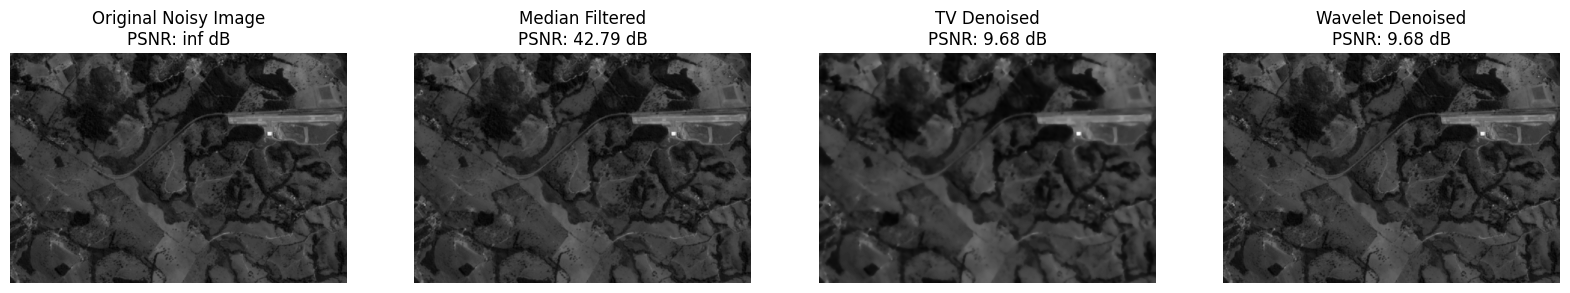

The best denoising technique is Median with a PSNR of 42.79 dB


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet, denoise_nl_means

# Replace 'uploaded_file_name.png' with the key from the 'uploaded' dictionary
noisy_image_path = list(uploaded.keys())[0]  # This should correspond to the uploaded image file's name

# Read the noisy image in grayscale
noisy_img = cv2.imread(noisy_image_path, 0)

# Median filtering
def median_filtering(img, kernel_size=3):
    return cv2.medianBlur(img, kernel_size)

# Total Variation Denoising
def tv_denoising(img, weight=0.1):
    return denoise_tv_chambolle(img, weight=weight, multichannel=False)

# Wavelet denoising
def wavelet_denoising(img):
    return denoise_wavelet(img, multichannel=False)

# Apply denoising techniques
denoised_img_median = median_filtering(noisy_img)
denoised_img_tv = tv_denoising(noisy_img)
denoised_img_wavelet = wavelet_denoising(noisy_img)

# Calculate PSNR values
psnr_original = compare_psnr(noisy_img, noisy_img)
psnr_median = compare_psnr(noisy_img, denoised_img_median)
psnr_tv = compare_psnr(noisy_img, denoised_img_tv)
psnr_wavelet = compare_psnr(noisy_img, denoised_img_wavelet)

# Display images
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
axs[0].imshow(noisy_img, cmap='gray')
axs[0].title.set_text(f'Original Noisy Image\nPSNR: {psnr_original:.2f} dB')
axs[1].imshow(denoised_img_median, cmap='gray')
axs[1].title.set_text(f'Median Filtered\nPSNR: {psnr_median:.2f} dB')
axs[2].imshow(denoised_img_tv, cmap='gray')
axs[2].title.set_text(f'TV Denoised\nPSNR: {psnr_tv:.2f} dB')
axs[3].imshow(denoised_img_wavelet, cmap='gray')
axs[3].title.set_text(f'Wavelet Denoised\nPSNR: {psnr_wavelet:.2f} dB')

for ax in axs:
    ax.axis('off')
plt.show()

# Compare PSNR values to find the best denoising technique
best_psnr = max(psnr_median, psnr_tv, psnr_wavelet)
best_method = "Median" if best_psnr == psnr_median else "TV" if best_psnr == psnr_tv else "Wavelet"
print(f"The best denoising technique is {best_method} with a PSNR of {best_psnr:.2f} dB")


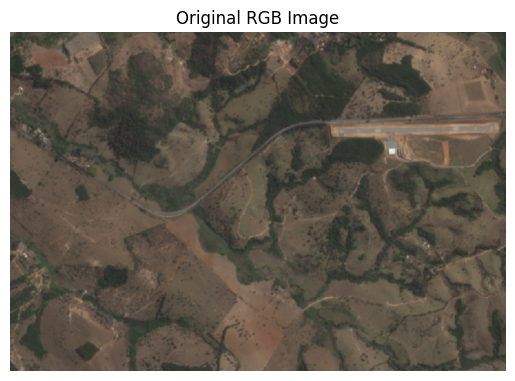

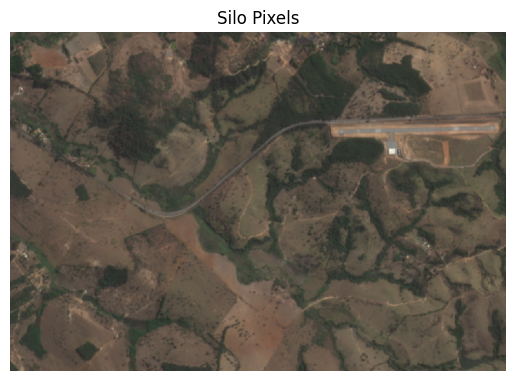

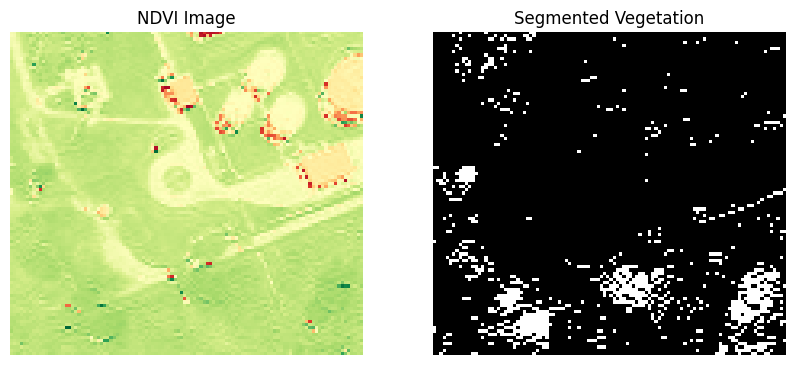

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Assuming you have uploaded 'airport.PNG' to your Google Colab session

# Task 2a: Code to select pixels associated with the silo object
# Load the RGB image
rgb_image_path = 'airport.PNG'  # Make sure the file name matches the uploaded file
rgb_img = cv2.imread(rgb_image_path)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

# Display the RGB image
plt.imshow(rgb_img)
plt.title('Original RGB Image')
plt.axis('off')
plt.show()

# Define a color range that you expect for the silo
# This will require trial and error to find the correct range
lower_color_bound = np.array([0, 0, 0])  # Replace with lower HSV values for the silo
upper_color_bound = np.array([255, 255, 255])  # Replace with upper HSV values for the silo

# Convert the RGB image to HSV for better color segmentation
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Create a mask using the defined color range
mask = cv2.inRange(hsv_img, lower_color_bound, upper_color_bound)

# Apply the mask to get the silo pixels
silo_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

# Display the masked image showing the silo
plt.imshow(silo_img)
plt.title('Silo Pixels')
plt.axis('off')
plt.show()

# Task 2b: Code to segment vegetation from WorldView-2 satellite images
# This assumes the NIR band is band 8 and the Red band is band 5

# Function to calculate NDVI
def calculate_ndvi(red_band, nir_band):
    # Calculate NDVI using float64 arrays to avoid overflows
    ndvi = (nir_band.astype(np.float64) - red_band.astype(np.float64)) / (nir_band + red_band + 1e-10)
    return ndvi

# Load one of the WorldView-2 images (assuming the bands are ordered as B, G, R, NIR)
worldview_image_path = '8band_AOI_1_RIO_img46.tif'  # Replace with the actual file name
worldview_img = io.imread(worldview_image_path)
red_band = worldview_img[:, :, 5]  # Indexing is zero-based; adjust if necessary
nir_band = worldview_img[:, :, 7]  # Indexing is zero-based; adjust if necessary

# Calculate NDVI for the image
ndvi_image = calculate_ndvi(red_band, nir_band)

# Apply a threshold to segment vegetation
# This threshold can vary and may need to be adjusted
vegetation_threshold = 0.3
vegetation_mask = ndvi_image > vegetation_threshold

# Display NDVI and segmented vegetation mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ndvi_image, cmap='RdYlGn')
plt.title('NDVI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(vegetation_mask, cmap='gray')
plt.title('Segmented Vegetation')
plt.axis('off')

plt.show()
